In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds


In [2]:
datos, metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\angel\tensorflow_datasets\fashion_mnist\incomplete.GPISWA_3.0.1\fashion_mnist-train.tfrecor…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\angel\tensorflow_datasets\fashion_mnist\incomplete.GPISWA_3.0.1\fashion_mnist-test.tfrecord…

Dataset fashion_mnist downloaded and prepared to C:\Users\angel\tensorflow_datasets\fashion_mnist\3.0.1. Subsequent calls will reuse this data.


import 

In [3]:
metadatos

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_dir='C:\\Users\\angel\\tensorflow_datasets\\fashion_mnist\\3.0.1',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,


In [4]:
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']

In [5]:
nombres_clases = metadatos.features['label'].names

In [6]:
nombres_clases

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
#Normalizar datos 

def normalizar(imagenes, etiquetas):
    imagenes = tf.cast(imagenes, tf.float32)
    imagenes /= 255 #aqui lo paso de 0-255 a 0-1
    return imagenes, etiquetas

#Normalizar los datos de entrenamiento y pruebas con la funcion qui hicimos 
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)


#agregar a cache

datos_entrenamiento = datos_entrenamiento.cache()


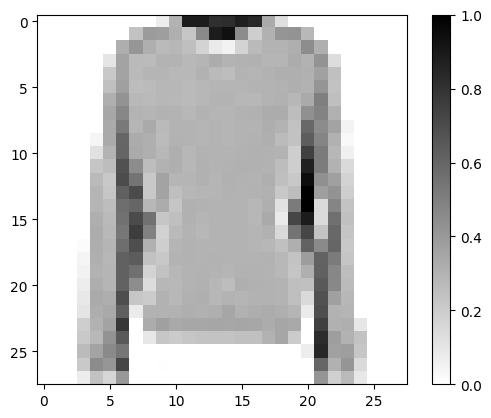

In [8]:
for imagen, etiqueta in datos_entrenamiento.take(1):
    break
imagen = imagen.numpy().reshape((28,28)) #Redimencionar, coasa de tensores 

import matplotlib.pyplot as plt


plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


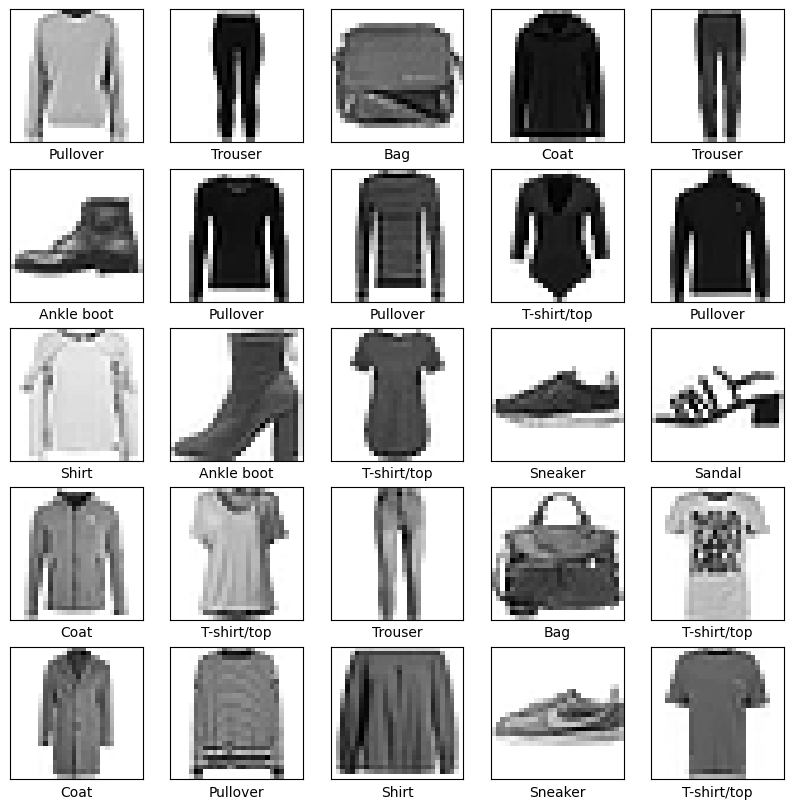

In [10]:
plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
    imagen = imagen.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagen, cmap=plt.cm.binary)
    plt.xlabel(nombres_clases[etiqueta])
plt.show()

In [11]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)), #Aplanar la imagen
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) #10 neuronas por las 10 clases
])

C:\Users\angel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
#Compilar el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [13]:
num_ej_entrenamiento = metadatos.splits['train'].num_examples
num_ej_pruebas = metadatos.splits['test'].num_examples

print(num_ej_entrenamiento)
print(num_ej_pruebas)


60000
10000


In [14]:
TAMANO_LOTE = 32

datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_ej_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

In [15]:
import math

historial = modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch=math.ceil(num_ej_entrenamiento/TAMANO_LOTE))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7554 - loss: 0.6972
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8573 - loss: 0.3899
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8709 - loss: 0.3532
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8790 - loss: 0.3342
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8846 - loss: 0.3070


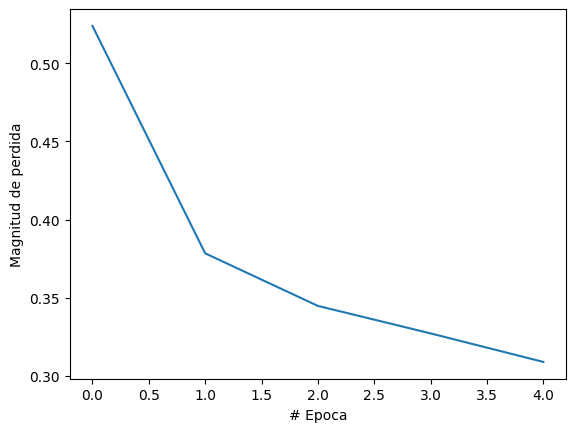

In [16]:
plt.xlabel('# Epoca')
plt.ylabel('Magnitud de perdida')
plt.plot(historial.history['loss'])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


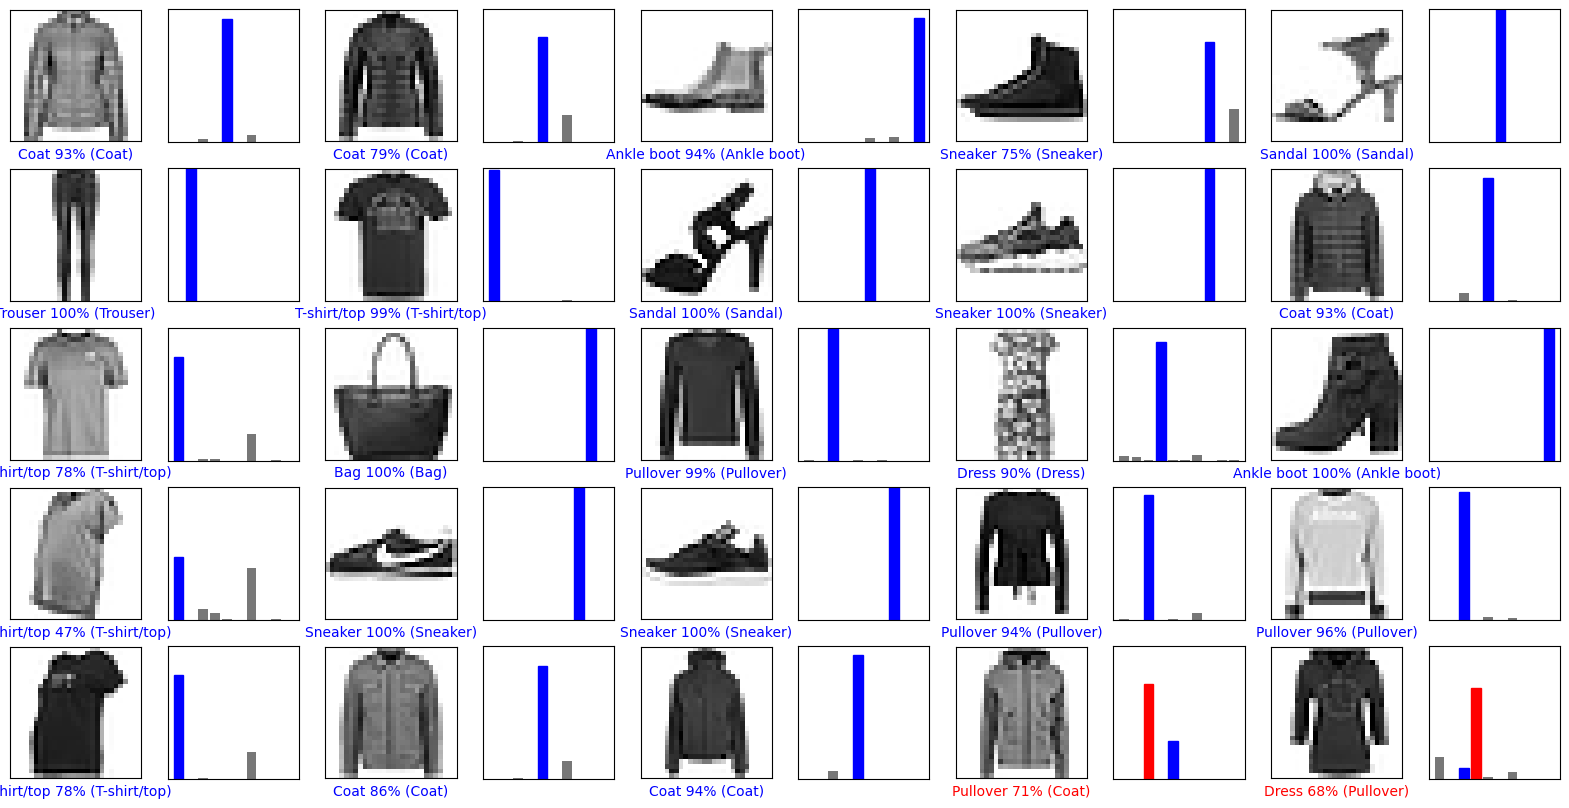

In [17]:
import numpy as np


for imagenes_prueba, etiqueta_prueba in datos_pruebas.take(1):
    imagenes_prueba = imagenes_prueba.numpy()
    etiqueta_prueba = etiqueta_prueba.numpy()
    predicciones = modelo.predict(imagenes_prueba)
def graficar_imagen(i, arr_prediciones, etiqueta_reales, imagenes):
    arr_prediciones, etiqueta_real, img = arr_prediciones[i], etiqueta_reales[i], imagenes[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[...,0], cmap=plt.cm.binary)
    etiqueta_prediccion = np.argmax(arr_prediciones)
    if etiqueta_prediccion == etiqueta_real:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel('{} {:2.0f}% ({})'.format(nombres_clases[etiqueta_prediccion],
                                         100*np.max(arr_prediciones),
                                         nombres_clases[etiqueta_real]),
                                         color=color)
    
def graficar_valor_arreglo(i, arr_prediciones, etiqueta_real):
    arr_prediciones, etiqueta_real = arr_prediciones[i], etiqueta_real[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), arr_prediciones, color='#777777')
    plt.ylim([0, 1])
    etiqueta_prediccion = np.argmax(arr_prediciones)
    
    thisplot[etiqueta_prediccion].set_color('red')
    thisplot[etiqueta_real].set_color('blue')

filas = 5
colomnas = 5
num_imagenes = filas*colomnas
plt.figure(figsize=(2*2*colomnas, 2*filas))
for i in range(num_imagenes):
    plt.subplot(filas, 2*colomnas, 2*i+1)
    graficar_imagen(i, predicciones, etiqueta_prueba, imagenes_prueba)
    plt.subplot(filas, 2*colomnas, 2*i+2)
    graficar_valor_arreglo(i, predicciones, etiqueta_prueba)

In [18]:
#Tomar cualquiera indice del set de prueba para ver su prediccion 
imagen = imagenes_prueba[10]
imagen = np.array([imagen])
prediccion = modelo.predict(imagen)
print('Prediccion: ' + nombres_clases[np.argmax(prediccion[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Prediccion: T-shirt/top


In [ ]:
modelo.save('modelos_exportado.h5')


In [20]:
!ls

"ls" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
